In [2]:
import socket
import json
from opensky_api import OpenSkyApi
import time

In [40]:
class Server(object):
    
    def __init__(self,host,port):
        self._host = host
        self._port = port
        
    def __enter__(self):
        
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        sock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR,1)
        sock.bind((self._host,self._port))
        sock.listen(10)
        self._sock = sock
        return self._sock
    
    def __exit__(self,*exc_info):
        
        if exc_info[0]:
            
            import traceback
            traceback.print_exception(*exc_info)
            
        self._sock.close()

In [41]:
#if __name__ == '__main__':
host = 'localhost'
port = 5555
api = OpenSkyApi()

with Server(host,port) as s:
    
    while True:
        
        conn, addr = s.accept()
        time.sleep(10)
        states = api.get_states(bbox=(45.8389, 47.8229, 5.9962, 10.5226))
        try:
            
            data = json.dumps([s.__dict__ for s in states.states]).encode('utf-8')
            #print("Sent :" + str(len(data)) + " bytes")
            conn.send(data)
            
        except AttributeError:
                
                print("Sent :" + "0 bytes")
        
        conn.close()

Sent :25129 bytes
Sent :25110 bytes
Sent :25117 bytes
Sent :25128 bytes
Sent :25827 bytes
Sent :25071 bytes
Sent :25843 bytes
Sent :25464 bytes
Sent :25853 bytes
Sent :26622 bytes
Sent :24724 bytes
Sent :25058 bytes
Sent :25842 bytes
Sent :26211 bytes
Sent :26623 bytes
Sent :27022 bytes
Sent :27029 bytes
Sent :27036 bytes
Sent :27019 bytes
Sent :27020 bytes
Sent :27010 bytes
Sent :26970 bytes
Sent :27387 bytes
Sent :27731 bytes
Sent :27756 bytes
Sent :28540 bytes
Sent :27792 bytes
Sent :27032 bytes
Sent :26651 bytes
Sent :27010 bytes
Sent :27015 bytes
Sent :27452 bytes
Sent :27076 bytes
Sent :27074 bytes
Sent :25958 bytes
Sent :25951 bytes
Sent :27062 bytes
Sent :26658 bytes
Sent :26697 bytes
Sent :27049 bytes
Sent :27421 bytes
Sent :27030 bytes
Sent :26682 bytes
Sent :25921 bytes
Sent :25540 bytes
Sent :25922 bytes
Sent :25211 bytes
Sent :24818 bytes
Sent :24448 bytes
Sent :24823 bytes
Sent :24824 bytes
Sent :24807 bytes
Sent :25543 bytes
Sent :24818 bytes
Sent :24436 bytes
Sent :2515

Traceback (most recent call last):
  File "C:\Users\lmota\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connection.py", line 171, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "C:\Users\lmota\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\util\connection.py", line 56, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\lmota\AppData\Local\Continuum\anaconda3\lib\socket.py", line 745, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11004] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\lmota\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\lmota\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py"

ConnectionError: HTTPSConnectionPool(host='opensky-network.org', port=443): Max retries exceeded with url: /api/states/all?time=0&lamin=45.8389&lamax=47.8229&lomin=5.9962&lomax=10.5226 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000000013163EF0>: Failed to establish a new connection: [Errno 11004] getaddrinfo failed',))

In [55]:
api = OpenSkyApi()
states = api.get_states(bbox=(36.58354, 42.6654, 0.3037, 4.6093))
data = json.dumps([s.__dict__ for s in states.states]).encode('utf-8')
data = json.loads(data)

In [56]:
import pandas as pd
df_airlines = pd.io.json.json_normalize(data)
df_airlines['HIT'] = 1
df_airlines = df_airlines.groupby('origin_country').count().reset_index()[['origin_country','HIT']]

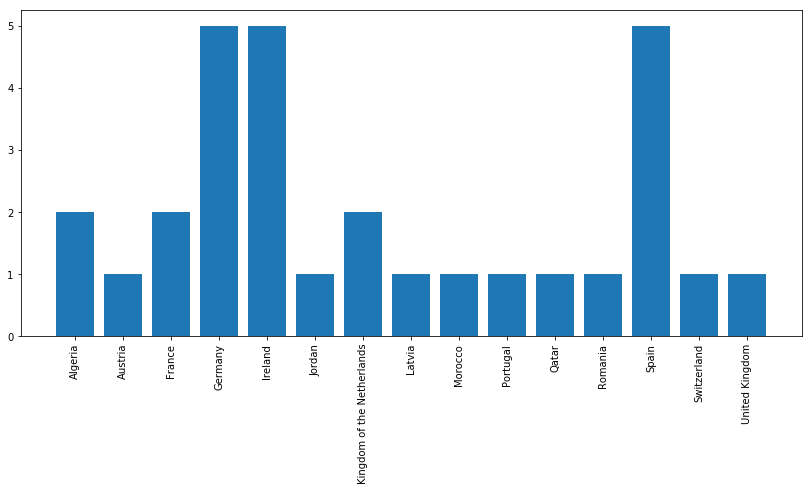

In [57]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

x = range(df_airlines.shape[0])
fig, ax = plt.subplots(figsize=(14,6))
plt.bar(x, df_airlines.HIT)
plt.xticks(x, df_airlines.origin_country, rotation='vertical')
plt.show()
#display.clear_output(wait=True)
#display.display(plt.gcf())

In [58]:
df_coordinates = pd.io.json.json_normalize(data)[['latitude','longitude']]

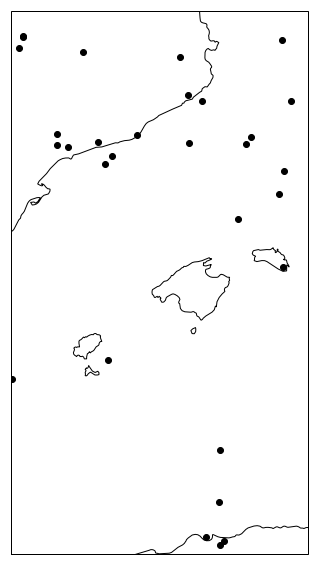

In [59]:
import cartopy
import cartopy.feature as cpf
from matplotlib.pyplot import figure, show

ax = figure(figsize=(14,10)).gca(projection=cartopy.crs.Mercator())
ax.set_extent([0.3037923, 4.6093246, 36.5835498, 42.6654129])
ax.coastlines(resolution='10m')

#ax.add_feature(cpf.LAND)
#ax.add_feature(cpf.OCEAN)
#ax.add_feature(cpf.COASTLINE)
#ax.add_feature(cpf.BORDERS, linestyle='-')
#ax.add_feature(cpf.LAKES, alpha=0.5)
#ax.add_feature(cpf.RIVERS)

#ax.set_extent([5.9962, 10.5226, 45.8389, 47.8229]) #45.8389, 47.8229, 5.9962, 10.5226

plt.scatter(df_coordinates.longitude, df_coordinates.latitude,
         color='black', marker='o',
            
         transform=cartopy.crs.Geodetic())

show()